## Modelling Stock Markets

Version 1

Version 2
- Randomising Agent buying/selling
- Close the system [x]
- Dynamic stock change 
- Visualise wealth 

In [ ]:
### AGENTS ###

class herd_trader:
    def __init__(self, budget, strategy):
        self.budget = budget
        self.strategy = strategy
    traders_list   = [trader(100,'herd') for i in range(traders)]





In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
import seaborn as sns
import datetime
import mpld3



In [56]:


def buy(market, trader, stock):
    # if the trader can afford
    budget = market.loc[str('trader_' + str(trader+1)), 'wallet']
    current_price = market.loc['current_price', str('so_' + str(stock+1))]
    counts = market.loc['counts', str('so_' + str(stock+1))]
    
    if budget > current_price and counts > 0:
        # buy the stock
        market.loc[str('trader_' + str(trader+1)), str('so_' + str(stock+1))] +=1
        
        # subtract from wallet
        market.loc[str('trader_' + str(trader+1)), 'wallet'] -= current_price
        
        # subtract from stock count 
        market.loc['counts', str('so_' + str(stock+1))] -= 1
        
        # inflate price of stock
        market.loc['current_price', str('so_' + str(stock+1))] *= 1.1


def sell(market, trader, stock):
    current_price = market.loc['current_price', str('so_' + str(stock+1))]
    
    if market.loc[str('trader_' + str(trader+1)), str('so_' + str(stock+1))] >0:
        # trader loses the stock
        market.loc[str('trader_' + str(trader+1)),str('so_' + str(stock+1))] -= 1
        
        # trader gains money placed in wallet
        market.loc[str('trader_' + str(trader+1)), 'wallet'] += current_price
        
        # add stock count 
        market.loc['counts', str('so_' + str(stock+1))] += 1
        
        # deflate the stock price
        market.loc['current_price',str('so_' + str(stock+1))] *= 0.99

def calculate_index(market, index, method = 'average'):
    if method == 'average':
        ind = ((market.iloc[2,1:].sum()/20) / index[-1] ) * 1000
        index.append(ind)

        
def stock_decay(market, stock_options):
    # if stock is more than perceived value
    # deflate the stock price
    for stock in range(stock_options):
        market.loc['current_price',str('so_' + str(stock+1))] *= 0.999999



In [57]:
## util ##

def plot(market):
    fig = plt.figure(figsize=(12,12))
    r = sns.heatmap(market, cmap='BuPu',annot=True, fmt='.1f')
    r.set_title("Heatmap of Market")


In [58]:
def init_market(traders= 40, stock_options=20):
    
    # initialise market
    colnames = [ 'wallet']
    rownames = [ 'counts','perceived_value','current_price']
    for i in range(stock_options):
        colnames.append('so_' + str(i+1))
    for o in range(traders):
        rownames.append('trader_' + str(o+1))
    market = pd.DataFrame(0, index=rownames,columns=colnames)
    
    # initialise budgets for traders
    mu, sigma = 500, 20  
    budgets = np.random.normal(mu, sigma, traders)
    market.loc[3:,'wallet'] = budgets
    
    # initialise stock option counts
    values = np.random.randint(10, 50, stock_options)
    market.loc['counts',1:] = values
       
    # initialise stock option values
    mu, sigma = 30, 5  
    values = np.random.normal(mu, sigma, stock_options)
    market.loc['perceived_value',1:] = values
       
    
    # initialise stock option prices
    mu, sigma = 29, 4  
    values = np.random.normal(mu, sigma, stock_options)
    market.loc['current_price',1:] = values
       
    
    plot(market)
    
    # initializing index
    index = []
    index.append(1000)
    
    
    return market,index  

In [61]:
def run_market(market,index,duration=20,traders= 40, stock_options=20):
    traders = list(range(traders))
    
    for day in range(duration):
        for stock in range(stock_options):
            for trader in traders:
                # trader will buy if stock perceived value > current value
                stock_price = market.loc['current_price',str('so_' + str(stock+1))]
                stock_value = market.loc['perceived_value',str('so_' + str(stock+1))]
                
                if stock_price < stock_value:
                    buy(market, trader, stock)
                if stock_price > stock_value:
                    sell(market, trader, stock)
                #stock_decay(market,stock_options)
            traders = shuffle(traders)
        calculate_index(market, index)
                    
    
    # reflect current prices on stock ownings
    for stock in range(stock_options):
        market.iloc[3:,stock+1] = market.iloc[3:,stock+1]*market.iloc[2,stock+1]

    plot(market)
    

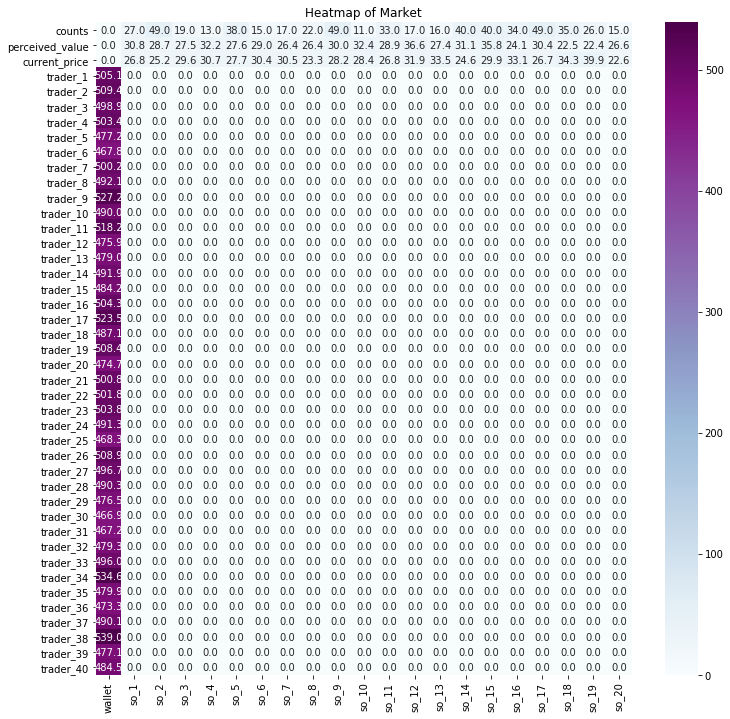

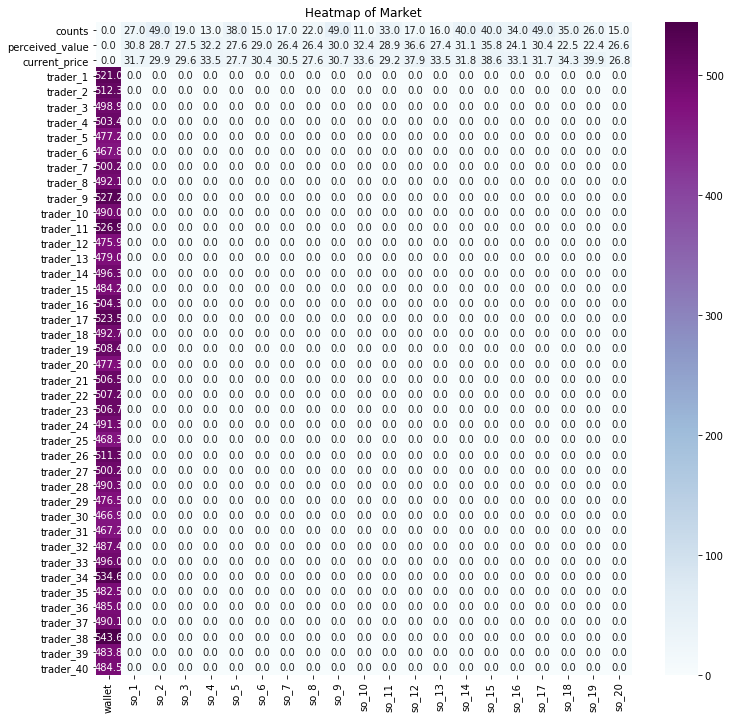

In [62]:
market,index = init_market()
run_market(market,index)

## Market Index 

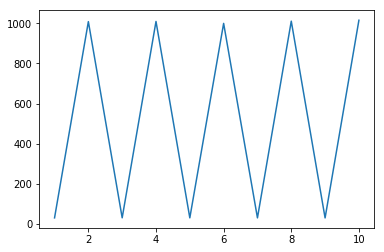

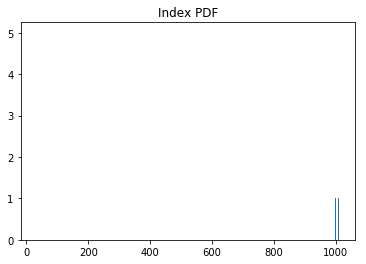

In [13]:
plt.plot(range(1,len(index)),index[1:])
plt.show()
#mpld3.show()
plt.clf()
plt.hist(index, bins= np.arange(min(index)-0.5, max(index)+0.5))  
plt.title("Index PDF")
plt.show()
#savefig('index_pdf.jpg', bbox_inches='tight')
plt.clf()

## Wealth Distrbution
- Smoothened 


In [ ]:
plt.boxplot(index)
plt.show()
data = list(filter(lambda x: x < 1000, index))
plt.hist(data, bins= np.arange(min(data)-500, max(data)+500))  
plt.title("Index PDF")
plt.show()
#savefig('index_pdf.jpg', bbox_inches='tight')
plt.clf()
